In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()


type(xtrain)

numpy.ndarray

In [ ]:
xtrain.shape

(50000, 32, 32, 3)

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
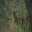

In [ ]:
xtrain[10]

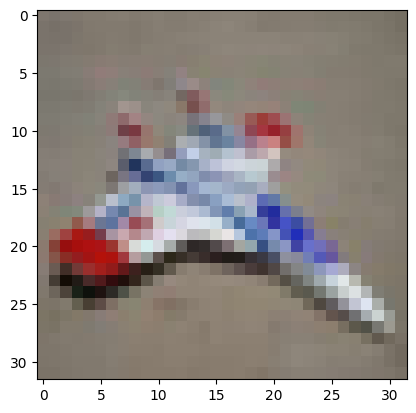

In [ ]:
img0 = plt.imshow(xtrain[30])

In [ ]:
lab1 = ytrain[30]
print(lab1)

[0]


In [ ]:
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
print("Image class is",classification[ytrain[30][0]])

Image class is airplane


In [ ]:
ytrain_one_hot = to_categorical(ytrain)
ytest_one_hot = to_categorical(ytest)

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtrain[30]

array([[[0.49411765, 0.4627451 , 0.43137255],
        [0.47843137, 0.45098039, 0.42352941],
        [0.49411765, 0.46666667, 0.43529412],
        ...,
        [0.48627451, 0.4627451 , 0.41568627],
        [0.47058824, 0.44705882, 0.4       ],
        [0.45882353, 0.43529412, 0.38823529]],

       [[0.47843137, 0.45098039, 0.41960784],
        [0.46666667, 0.43921569, 0.40784314],
        [0.4745098 , 0.44705882, 0.41568627],
        ...,
        [0.48627451, 0.4627451 , 0.41568627],
        [0.47843137, 0.45490196, 0.40784314],
        [0.45882353, 0.43529412, 0.38823529]],

       [[0.47843137, 0.45098039, 0.41960784],
        [0.4745098 , 0.44705882, 0.41568627],
        [0.4745098 , 0.44705882, 0.41568627],
        ...,
        [0.49411765, 0.47058824, 0.42352941],
        [0.48235294, 0.45882353, 0.41176471],
        [0.4745098 , 0.45098039, 0.40392157]],

       ...,

       [[0.49411765, 0.4627451 , 0.41960784],
        [0.49411765, 0.4627451 , 0.41960784],
        [0.50196078, 0

In [ ]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))

#add a layer
model.add(Dense(250,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
tr = model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=1,validation_split=0.2)

157/157 [==============================] - 71s 440ms/step - loss: 1.7767 - accuracy: 0.3338 - val_loss: 1.4801 - val_accuracy: 0.4533


In [ ]:
model.evaluate(xtest,ytest_one_hot)

313/313 [==============================] - 6s 18ms/step - loss: 1.4701 - accuracy: 0.4501


[1.4700883626937866, 0.45010000467300415]

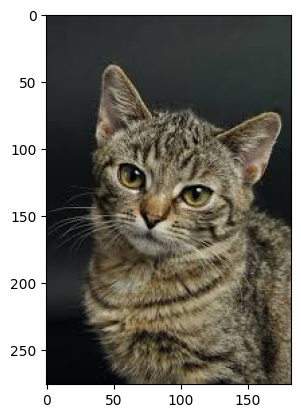

In [51]:
cat = plt.imread('/content/catpic.jpeg')
plt.imshow(cat)

In [52]:
from skimage import transform

In [53]:
resize = transform.resize(cat,(32,32,3))

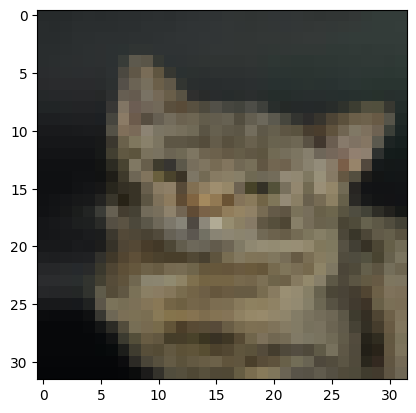

In [54]:
img = plt.imshow(resize)

In [55]:
prediction = model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 23ms/step
[[0.00975642 0.00573559 0.10757984 0.20867102 0.15834528 0.18764429
  0.22630592 0.07892998 0.00696807 0.01006354]]


In [56]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
print(list_index)

[6, 3, 5, 4, 2, 7, 9, 0, 8, 1]


In [57]:
for i in range(5):
  print(classification[list_index[i]])


frog
cat
dog
deer
bird
